# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

# Reading the file using pandas 

In [2]:
data = pd.read_csv("E:\\Datasets\predict.csv")
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


## This is used to find any row in the data

In [3]:
data.loc[data['year']==1970]

,year,per capita income (US$)
0,1970,3399.299037


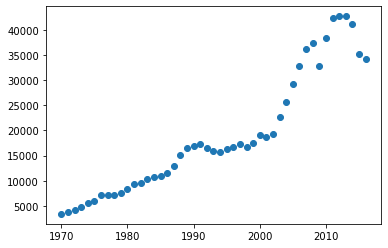

In [4]:
plt.scatter(data[['year']],data[['per capita income (US$)']])
plt.show()

In [5]:
data.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


# Sklearn model

In [6]:
x=data[['year']]
y=data[['per capita income (US$)']]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [8]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [9]:
reg.coef_

array([[770.31368318]])

In [10]:
reg.intercept_

array([-1517030.97951912])

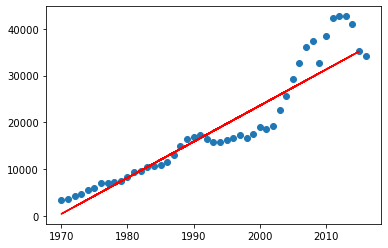

In [11]:
plt.scatter(data[['year']],data[['per capita income (US$)']])
plt.plot(x_train,reg.intercept_+reg.coef_*x_train,'-r')
plt.show()

In [12]:
y_pred = reg.predict(x_test)
y_pred

array([[35921.40577272],
       [19744.81842593],
       [ 8960.4268614 ],
       [17433.87737638],
       [10501.05422776],
       [28988.58262409],
       [32069.83735681],
       [33610.46472317],
       [12811.9952773 ],
       [18204.19105957],
       [15122.93632684],
       [ 1257.29002959],
       [ 5879.17212868],
       [ 4338.54476232],
       [32840.15103999]])

In [13]:
y_test

,per capita income (US$)
46,34229.193630
25,16369.317250
11,9434.390652
22,16412.083090
13,10416.536590
37,36144.481220
41,42334.711210
43,42676.468370
16,11482.891530
23,15875.586730


# Exception handling 

In [14]:
try:
    pred=reg.predict([[2022]])
except ValueError:
    print("This must be given in 2d array")
except Exception as ex:
    print(ex)
else:
    print(pred)
finally:
    print("This block of code excuted successfully ")

[[40543.2878718]]
This block of code excuted successfully 


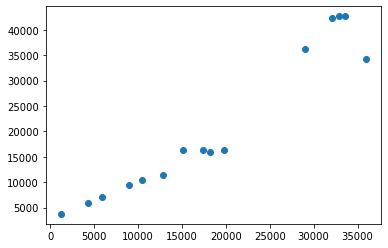

In [15]:
plt.scatter(y_pred,y_test)
plt.show()

In [16]:
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))

Mean absolute Error:  per capita income (US$)    3554.195255
dtype: float64
Root mean square error:  per capita income (US$)    5.032384e+06
dtype: float64
R2 square:  0.8041180517509825


In [17]:
import pickle

In [18]:
with open("model.pkl","wb") as f:
    pickle.dump(reg,f)

In [19]:
with open("model.pkl","rb") as f:
    model=pickle.load(f)

In [20]:
model.predict([[2022]])

array([[40543.2878718]])